### Install Libraries and Packages

In [1]:
!pip install plotly


In [2]:
!pip install git+https://github.com/huggingface/accelerate.git


  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-opc1h_1y
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-opc1h_1y
  Resolved https://github.com/huggingface/accelerate.git to commit cd515812483aedd070933c3367366a0b5ef43daa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00
  Created wheel for accelerate: filename=accelerate-0.25.0.dev0-py3-none-any.whl size=264384 sha256=24ed09ccdccd7c9763f7422920a69d301c4f79e5eac06ed229a2e5417d79fda1
  Stored in directory: /tmp/pip-ephem-wheel-cache-iuln_rfr/wheels/9c/a3/1e/47368f9b6575655fe9ee1b6350cfa7d4b0befe66a35f8a8365
Successfully built accelerate


In [3]:
!pip install textblob
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [14]:
pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_excel('/content/UU_FullSCope.xlsx')

In [6]:
# Inspect the dataset
print(df.head())


                                          UTTERANCES PROMPT TYPE  \
0                       Give me another day and time      entity   
1                        Never received confirmation      entity   
2                         No I've got the TV working      entity   
3  They did leave a message somebody called Cingular      entity   
4              I would like to speak to tech support      entity   

      TASK NAME                NODE NAME  \
0  rschdle appt      CaptureCounterOffer   
1     cnfm appt     ApptsDetailsReadBack   
2     cncl appt  ConfirmCancelCaptureYes   
3     cnfm appt     ApptsDetailsReadBack   
4     cnfm appt     ApptsDetailsReadBack   

                                   USERID        CHANNELUID  \
0  u-f6b814c1-f6db-5144-9bf9-774c95ab9ffa  1299e14865035af6   
1  u-84d7f60a-d926-575e-852b-d7a3dd442b5c  1199ed936502ebb9   
2  u-dd66de28-8782-54b7-ba46-66de691c0b3c  129983076502fa68   
3  u-78778fe1-5317-512b-9184-c45f69d39172  129940fa6502fa9f   
4  u-987846

In [7]:
df.tail()

,UTTERANCES,PROMPT TYPE,TASK NAME,NODE NAME,USERID,CHANNELUID,DATE & TIME,MESSAGEID,Potential Intent
10437,Hello,entity,Ask Intent,AskIntent,u-5b83ea17-46b6-566e-bdfa-485b823e5acc,1299b3bc65538a19,11-14-2023 (9:56 AM),ms-0fe2a948-4059-59a7-ace2-4a63245916c9,NaN
10438,The check is not here,message,Ask Intent,AskIntent,u-0143fb54-acb3-568c-993a-6f780d22ec66,1199c83865538a3e,11-14-2023 (9:56 AM),ms-dea9aa28-ce04-56b1-803a-356352bb2103,NaN
10439,No one showed it,entity,Ask Intent,AskIntent,u-0143fb54-acb3-568c-993a-6f780d22ec66,1199c83865538a3e,11-14-2023 (9:56 AM),ms-aa73d957-aeaa-55a4-a83c-8de9b788fd5d,NaN
10440,Go support,entity,Ask Intent,AskIntent,u-9a557169-8dac-5979-8ed0-b2ce5dc6c0e7,1299c4b665538a83,11-14-2023 (9:57 AM),ms-a4d38009-697d-55a9-8889-e402f10cf227,NaN
10441,Okay,entity,Ask Intent,AskIntent,u-0d1fe05e-6b94-5cbb-b89f-a6b5a5f7b279,12998d5a65538aa2,11-14-2023 (9:57 AM),ms-87ee1da6-8c31-579b-90ce-f28de4182f3e,NaN


In [8]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10442 entries, 0 to 10441
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UTTERANCES        10442 non-null  object
 1   PROMPT TYPE       10442 non-null  object
 2   TASK NAME         10442 non-null  object
 3   NODE NAME         10442 non-null  object
 4   USERID            10442 non-null  object
 5   CHANNELUID        10442 non-null  object
 6   DATE & TIME       10442 non-null  object
 7   MESSAGEID         10442 non-null  object
 8   Potential Intent  124 non-null    object
dtypes: object(9)
memory usage: 734.3+ KB
None


In [9]:
# Check for missing values
print(df.isnull().sum())

UTTERANCES              0
PROMPT TYPE             0
TASK NAME               0
NODE NAME               0
USERID                  0
CHANNELUID              0
DATE & TIME             0
MESSAGEID               0
Potential Intent    10318
dtype: int64


In [10]:
df = df[['UTTERANCES', 'TASK NAME', 'NODE NAME', 'DATE & TIME']]

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10442 entries, 0 to 10441
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UTTERANCES   10442 non-null  object
 1   TASK NAME    10442 non-null  object
 2   NODE NAME    10442 non-null  object
 3   DATE & TIME  10442 non-null  object
dtypes: object(4)
memory usage: 326.4+ KB
None


In [12]:
print(df.describe())

       UTTERANCES         TASK NAME  NODE NAME           DATE & TIME
count       10442             10442      10442                 10442
unique       7977                 7         17                  7670
top          Okay  TriggerOnConnect  AskIntent  11-07-2023 (9:55 AM)
freq          332              4720       7966                     6


##Exploratory Data Analysis

In [16]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime
# Convert the 'DATE & TIME' column to datetime if it's not already

datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format=datetime_format)
# Create a widget to select the month for filtering
month_filter = widgets.Dropdown(
    options=['All'] + sorted(df['DATE & TIME'].dt.month.unique()),
    description='Select Month:',
)

# Create a button to apply the filter
apply_filter_button = widgets.Button(description='Apply Filter')

# Function to update the statistics based on the selected month
def update_statistics(selected_month):
    if selected_month == 'All':
        filtered_df = df
    else:
        filtered_df = df[df['DATE & TIME'].dt.month == selected_month]

    total_utterances = len(filtered_df)
    start_date = filtered_df['DATE & TIME'].min().strftime('%Y-%m-%d')
    end_date = filtered_df['DATE & TIME'].max().strftime('%Y-%m-%d')
    average_per_day = total_utterances / len(pd.date_range(start=start_date, end=end_date))
    average_per_week = total_utterances / (len(pd.date_range(start=start_date, end=end_date)) / 7)
    average_per_month = total_utterances / len(filtered_df['DATE & TIME'].dt.month.unique())

    stats_list = [
        f"Total Utterances: {total_utterances}",
        f"Start Date: {start_date}",
        f"End Date: {end_date}",
        f"Average Utterances per Day: {average_per_day:.2f}",
        f"Average Utterances per Week: {average_per_week:.2f}",
        f"Average Utterances per Month: {average_per_month:.2f}",
    ]

    return stats_list

# Function to handle button click
def on_apply_filter_button_click(b):
    selected_month = month_filter.value
    stats_list = update_statistics(selected_month)
    stats_output.clear_output(wait=True)
    with stats_output:
        for stat in stats_list:
            print(stat)

apply_filter_button.on_click(on_apply_filter_button_click)

# Output widget for displaying statistics
stats_output = widgets.Output()

# Initialize the statistics
update_statistics('All')

# Create a layout for widgets
widgets_layout = widgets.VBox([month_filter, apply_filter_button, stats_output])

# Display the widgets
display(widgets_layout)


In [19]:
utterance_counts = df['UTTERANCES'].value_counts()

# Convert the Series to a list of tuples (utterance, frequency)
utterance_frequency_list = list(utterance_counts.items())

utterance_frequency_list

[('Okay', 332),
 ('No', 256),
 ('Hello', 173),
 ('Yeah', 70),
 ('Oh', 63),
 ('Right', 43),
 ('Appointment', 37),
 ('Hey', 35),
 ('Service', 27),
 ('Three schedule', 23),
 ('What', 23),
 ('Call', 22),
 ("I don't know", 22),
 ('Question', 22),
 ("You can't", 21),
 ('Speak to a person', 20),
 ('Speak to an operator', 19),
 ('Today', 17),
 ('Q', 16),
 ('Thanks', 16),
 ('Well', 16),
 ('Hi', 15),
 ('Thank you', 15),
 ('Customer', 15),
 ('Bye', 14),
 ('Main menu', 14),
 ('Never mind', 14),
 ('Great', 14),
 ('Later', 13),
 ('Internet', 13),
 ('Customer care', 13),
 ('What is the appointment for', 11),
 ('Schedule', 11),
 ("He's not here", 11),
 ('Please', 11),
 ('Speak to a customer service representative', 10),
 ('So', 10),
 ('Telephone', 10),
 ('Wrong address', 10),
 ('Good', 9),
 ('Where is he', 9),
 ('Go back', 9),
 ('No problem', 9),
 ('Cable', 9),
 ('What time', 9),
 ('Here', 8),
 ('Services', 8),
 ('Talk to a rep', 8),
 ("They're not here yet", 8),
 ('Escalate', 8),
 ("He's not here yet

##Time Series Distribution

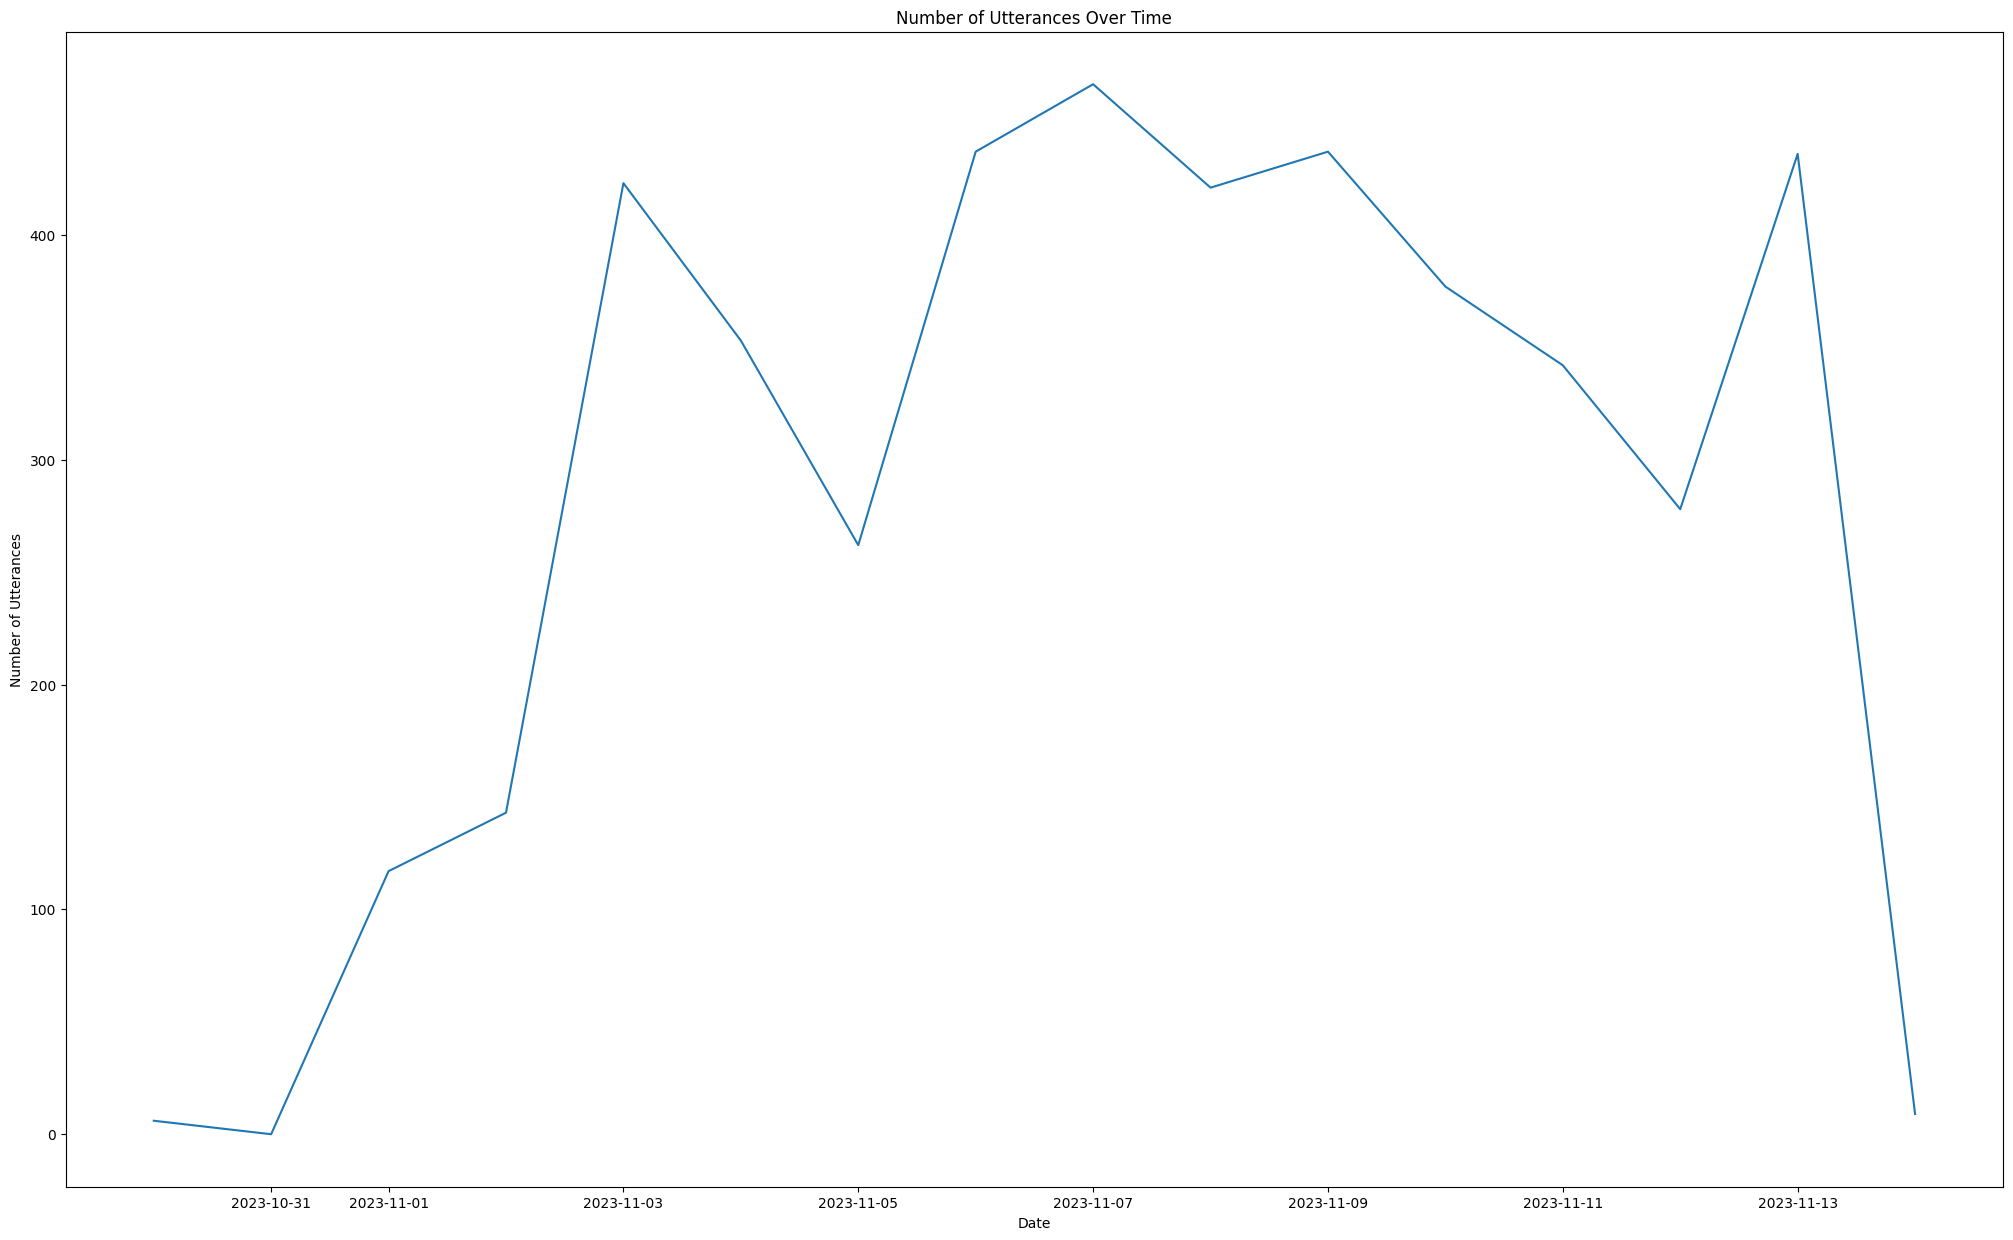

In [ ]:
# Convert 'DATE & TIME' to datetime
# The format '%m-%d-%Y (%I:%M %p)' corresponds to '11-14-2023 (4:02 PM)'
df['DATE & TIME'] = pd.to_datetime(df['DATE & TIME'], format='%m-%d-%Y (%I:%M %p)')


# Resample to get counts per day (or another time period)
utterances_daily = df.resample('D', on='DATE & TIME').count()

# Plot
plt.figure(figsize=(25, 15))
plt.plot(utterances_daily['UTTERANCES'])
plt.title('Number of Utterances Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Utterances')
plt.show()


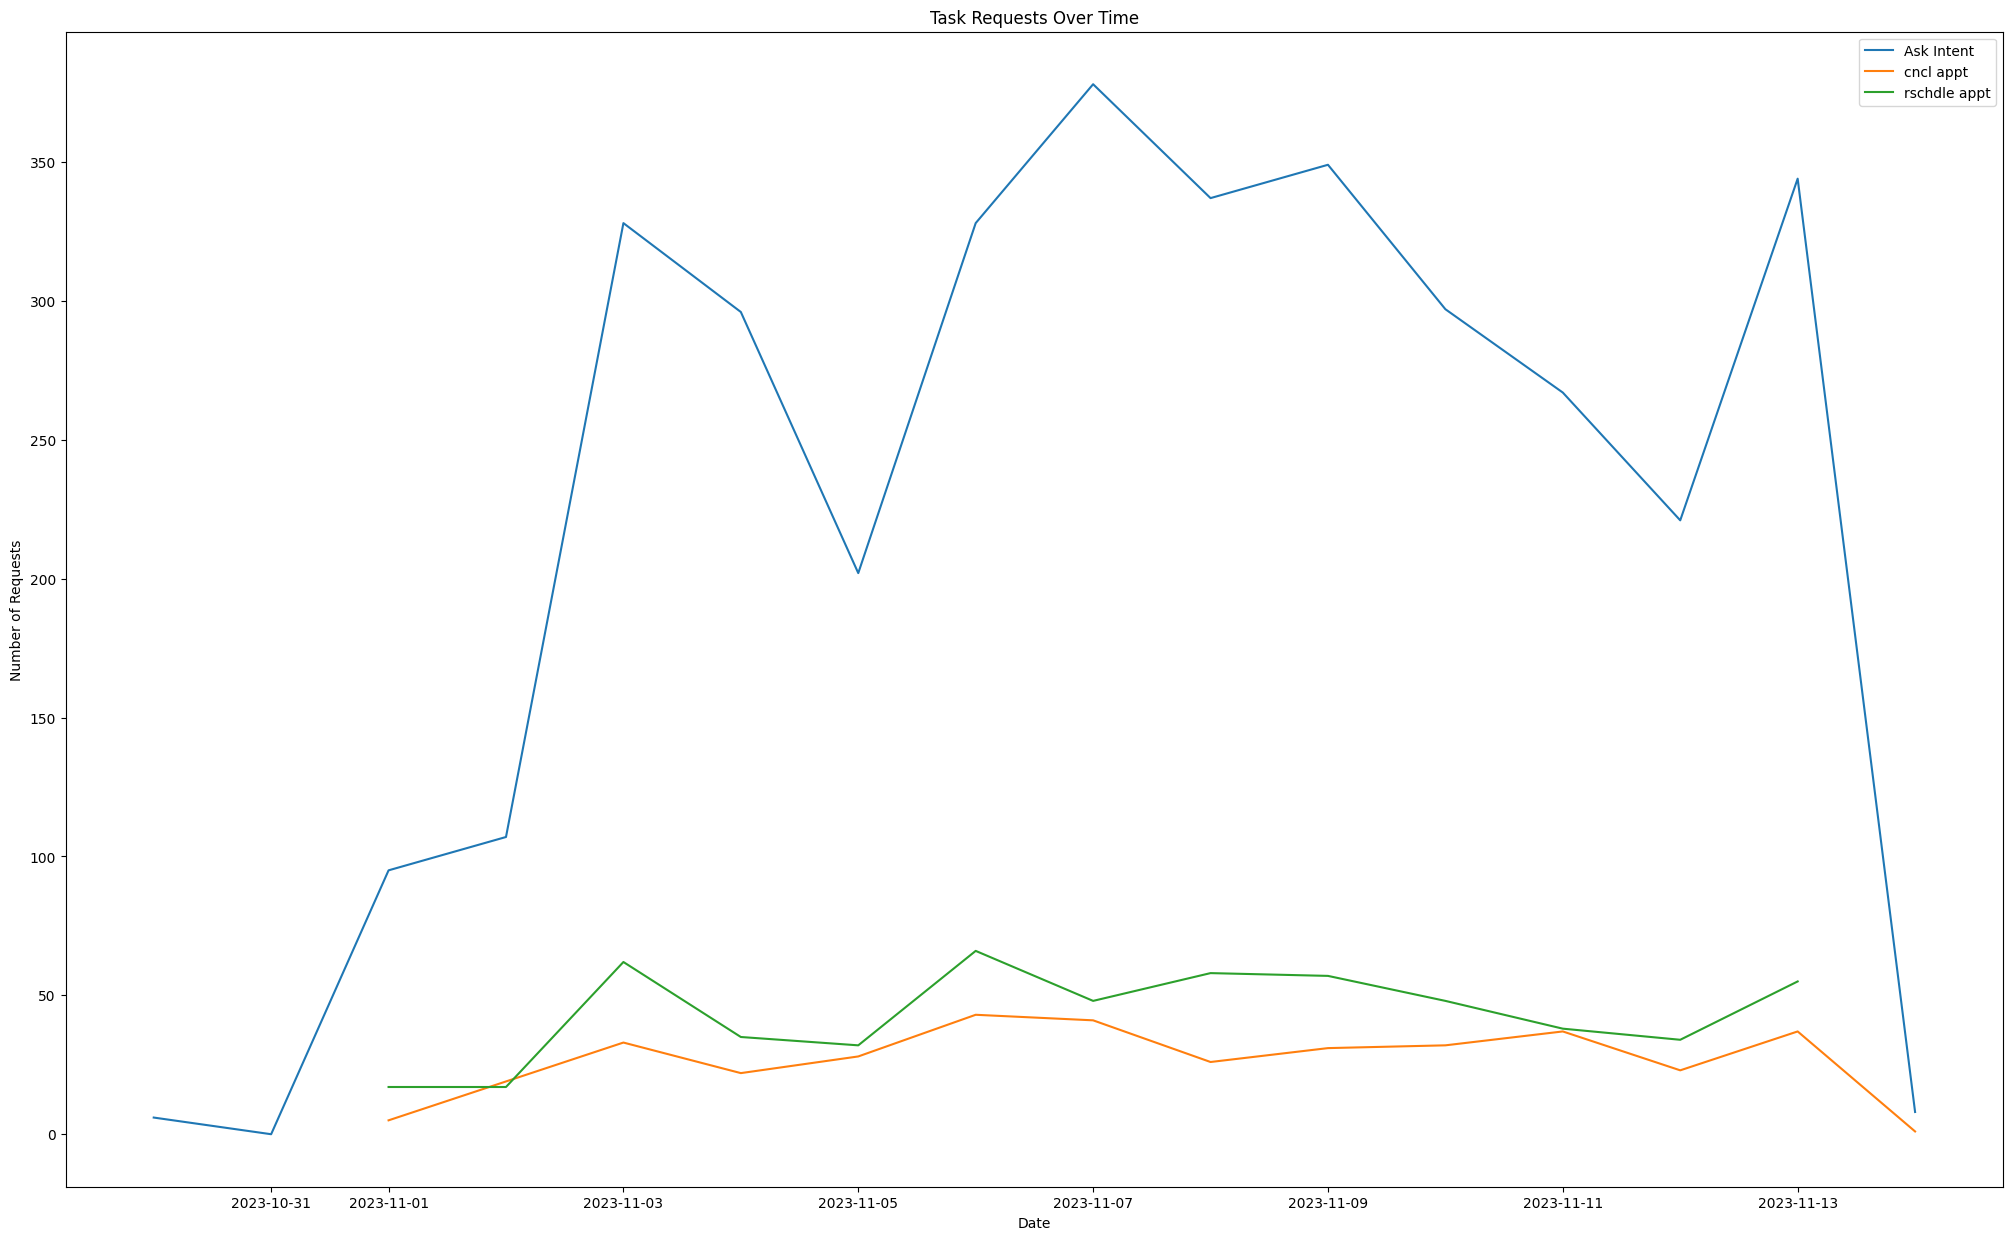

In [ ]:
# Group by 'TASK NAME' and resample
task_requests_daily = df.groupby('TASK NAME').resample('D', on='DATE & TIME').count()

# Plot
plt.figure(figsize=(25, 15))
for task in task_requests_daily['UTTERANCES'].unstack(level=0).columns:
    plt.plot(task_requests_daily['UTTERANCES'].unstack(level=0)[task], label=task)
plt.title('Task Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.legend()
plt.show()


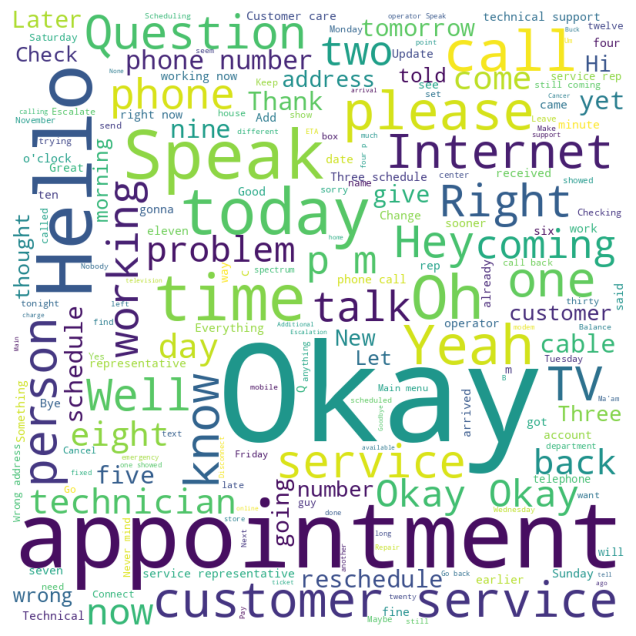

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df['UTTERANCES']))

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [23]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Load your DataFrame
df_filtered = pd.read_excel('/content/UU_FullSCope.xlsx')

# Specify the format of your 'DATE & TIME' column and convert it to datetime
datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df_filtered['DATE & TIME'] = pd.to_datetime(df_filtered['DATE & TIME'], format=datetime_format)
df_filtered['Month'] = df_filtered['DATE & TIME'].dt.month
df_filtered['Week'] = df_filtered['DATE & TIME'].dt.isocalendar().week
df_filtered['Day'] = df_filtered['DATE & TIME'].dt.day

# Search functionality
search_input = widgets.Text(description='Search Utterances:', placeholder='Enter utterances separated by commas')
month_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.Dropdown(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')
search_output = widgets.Output()

def search_utterances():
    with search_output:
        search_output.clear_output()
        search_texts = [text.strip().lower() for text in search_input.value.split(',')]
        selected_month = month_dropdown.value
        selected_week = week_dropdown.value
        selected_day = day_dropdown.value

        # Filter based on time frame
        filtered_df = df_filtered.copy()
        if selected_month != 'All':
            filtered_df = filtered_df[filtered_df['Month'] == selected_month]
        if selected_week != 'All':
            filtered_df = filtered_df[filtered_df['Week'] == selected_week]
        if selected_day != 'All':
            filtered_df = filtered_df[filtered_df['Day'] == selected_day]

        total_utterances = len(filtered_df)

        for search_text in search_texts:
            # Frequency of the searched utterance
            search_frequency = filtered_df[filtered_df['UTTERANCES'].str.lower().str.contains(search_text)]['UTTERANCES'].count()

            # Percentage frequency of the searched utterance
            search_percentage = (search_frequency / total_utterances) * 100 if total_utterances > 0 else 0

            # Find similar utterances
            similar_utterances = filtered_df[filtered_df['UTTERANCES'].str.lower().str.contains(search_text)]['UTTERANCES'].unique()

            # Total frequency including similar utterances
            total_frequency = search_frequency + sum(filtered_df['UTTERANCES'].str.lower().isin(similar_utterances).astype(int)) - len(similar_utterances) # Avoid double counting

            # Total percentage frequency including similar utterances
            total_percentage_frequency = (total_frequency / total_utterances) * 100 if total_utterances > 0 else 0

            print(f"Frequency of '{search_text}': {search_frequency} ({search_percentage:.2f}% of total)")
            print(f"Total Frequency (Search + Similar) of '{search_text}': {total_frequency} ({total_percentage_frequency:.2f}% of total)")

            # Display similar utterances
            if similar_utterances.size > 0:
                print(f"\nSimilar Utterances for '{search_text}':")
                for utterance in similar_utterances:
                    print(utterance)
            else:
                print(f"\nNo similar utterances found for '{search_text}'.")
            print("\n-------------------------\n")  # Separator for multiple searches

search_button = widgets.Button(description='Search')
search_button.on_click(lambda b: search_utterances())

# Display the widgets
display(widgets.VBox([search_input, month_dropdown, week_dropdown, day_dropdown, search_button, search_output]))


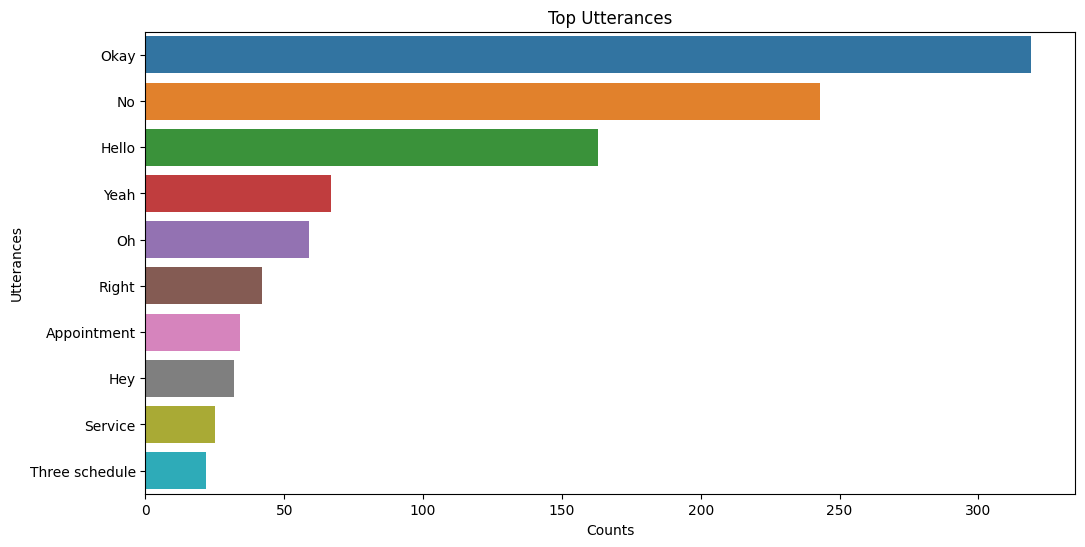

In [ ]:
# Count the occurrences of each utterance
utterance_counts = df['UTTERANCES'].value_counts().head(10)  # Top 10 utterances

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=utterance_counts.values, y=utterance_counts.index)
plt.title('Top Utterances')
plt.xlabel('Counts')
plt.ylabel('Utterances')
plt.show()


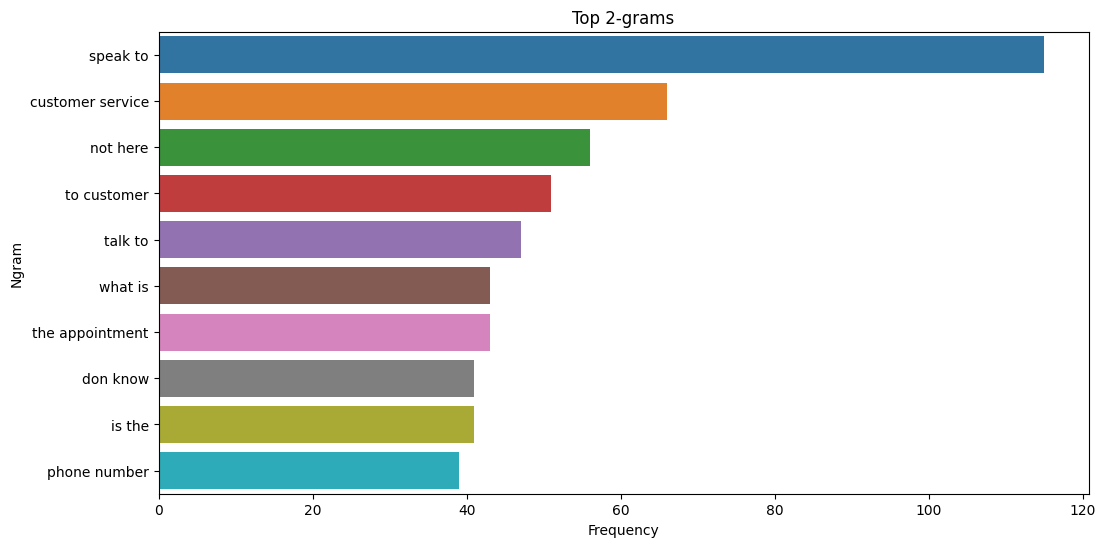

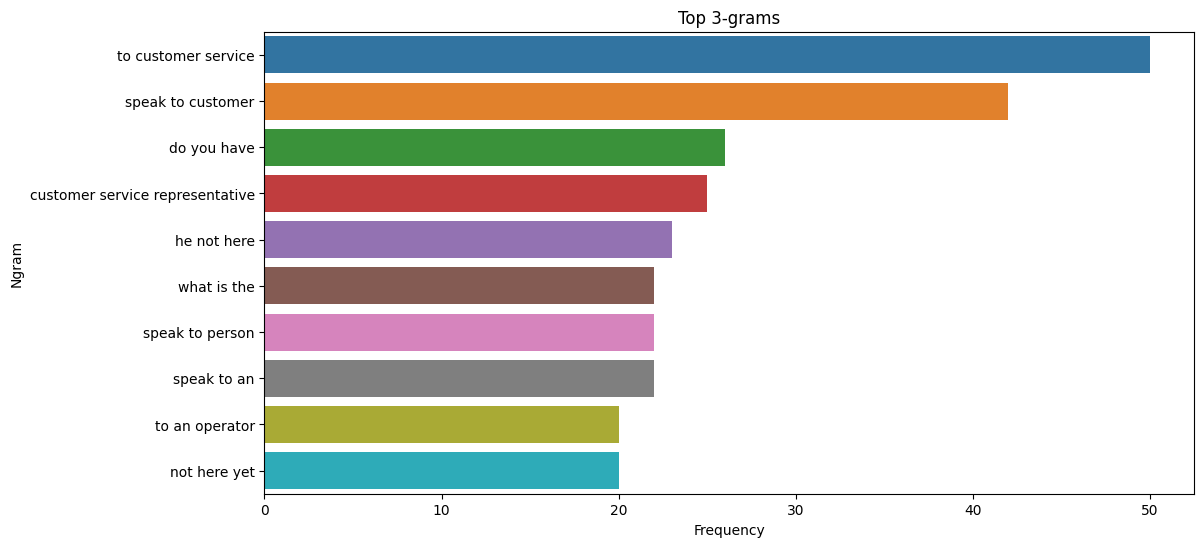

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot N-grams
def plot_ngrams(n):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit(df['UTTERANCES'])
    bag_of_words = vectorizer.transform(df['UTTERANCES'])
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_words = words_freq[:10]
    top_df = pd.DataFrame(top_words, columns=['Ngram', 'Frequency'])

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Ngram', data=top_df)
    plt.title(f'Top {n}-grams')
    plt.show()

# Plot bi-grams and tri-grams
plot_ngrams(2)
plot_ngrams(3)


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the variables for the visualizations
top_50_utterances = df['UTTERANCES'].value_counts().head(50)
top_25_utterances = df['UTTERANCES'].value_counts().head(25)

# Create subplots
fig = make_subplots()

# Add horizontal traces for top 50 and top 25 most frequent utterances
fig.add_trace(go.Bar(x=top_50_utterances.values, y=top_50_utterances.index, orientation='h', name='Top 50 Most Frequent Utterances'))
fig.add_trace(go.Bar(x=top_25_utterances.values, y=top_25_utterances.index, orientation='h', name='Top 25 Most Frequent Utterances'))

# Update layout for dropdown and adjust plot height
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label='Top 50 Most Frequent Utterances',
                     method='update',
                     args=[{'visible': [True, False]},
                           {'title': 'Top 50 Most Frequent Utterances'}]),
                dict(label='Top 25 Most Frequent Utterances',
                     method='update',
                     args=[{'visible': [False, True]},
                           {'title': 'Top 25 Most Frequent Utterances'}]),
            ]),
        )
    ],
    height=1200  # Adjust the height to accommodate the number of bars
)

# Update the layout and show the figure
fig.update_layout(title_text="Utterance Frequency Analysis", barmode='group')
fig.show()


In [ ]:
# Filter out specific words or phrases
excluded_words = {"call", "well", "please", "so", "thank you", "ok"}
filtered_utterances = df[~df['UTTERANCES'].isin(excluded_words)]
top_20_excluded = filtered_utterances['UTTERANCES'].value_counts().head(20)

# Function to filter utterances by word count
def top_n_word_utterances(n, top_n=20):
    if n >= 10:
        filtered = df[df['UTTERANCES'].str.split().str.len() >= n]
    else:
        filtered = df[df['UTTERANCES'].str.split().str.len() == n]
    return filtered['UTTERANCES'].value_counts().head(top_n)

# Prepare data for each word count category
top_2_words = top_n_word_utterances(2)
top_3_words = top_n_word_utterances(3)
top_4_words = top_n_word_utterances(4)
top_5_words = top_n_word_utterances(5)
top_6_words = top_n_word_utterances(6)
top_7_words = top_n_word_utterances(7)
top_8_words = top_n_word_utterances(8)
top_9_words = top_n_word_utterances(9)
top_10_plus_words = top_n_word_utterances(10)


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Exclude specific words or phrases from the analysis
excluded_words = {"call", "well", "please", "so", "thank you", "ok"}
filtered_utterances = df[~df['UTTERANCES'].str.split().apply(lambda x: any(word in excluded_words for word in x))]

# Function to filter utterances by word count
def top_n_word_utterances(n, top_n=20):
    if n >= 10:
        filtered = filtered_utterances[filtered_utterances['UTTERANCES'].str.split().str.len() >= n]
    else:
        filtered = filtered_utterances[filtered_utterances['UTTERANCES'].str.split().str.len() == n]
    return filtered['UTTERANCES'].value_counts().head(top_n)

# Prepare data for each word count category
top_3_words = top_n_word_utterances(3)
top_4_words = top_n_word_utterances(4)
top_5_words = top_n_word_utterances(5)
top_6_words = top_n_word_utterances(6)
top_7_words = top_n_word_utterances(7)
top_8_words = top_n_word_utterances(8)
top_9_words = top_n_word_utterances(9)
top_10_plus_words = top_n_word_utterances(10)

# Create subplots
fig = make_subplots()

# Add horizontal traces for each word count category
fig.add_trace(go.Bar(x=top_3_words.values, y=top_3_words.index, orientation='h', name='Top 20 3-Word Utterances'))
fig.add_trace(go.Bar(x=top_4_words.values, y=top_4_words.index, orientation='h', name='Top 20 4-Word Utterances'))
fig.add_trace(go.Bar(x=top_5_words.values, y=top_5_words.index, orientation='h', name='Top 20 5-Word Utterances'))
fig.add_trace(go.Bar(x=top_6_words.values, y=top_6_words.index, orientation='h', name='Top 20 6-Word Utterances'))
fig.add_trace(go.Bar(x=top_7_words.values, y=top_7_words.index, orientation='h', name='Top 20 7-Word Utterances'))
fig.add_trace(go.Bar(x=top_8_words.values, y=top_8_words.index, orientation='h', name='Top 20 8-Word Utterances'))
fig.add_trace(go.Bar(x=top_9_words.values, y=top_9_words.index, orientation='h', name='Top 20 9-Word Utterances'))
fig.add_trace(go.Bar(x=top_10_plus_words.values, y=top_10_plus_words.index, orientation='h', name='Top 20 10+ Word Utterances'))

# Define dropdown buttons for interactive plot
buttons = [
    dict(label=f'Top 20 {i}-Word Utterances',
         method='update',
         args=[{'visible': [i - 3 == j for j in range(8)]},
               {'title': f'Top 20 {i}-Word Utterances'}])
    for i in range(3, 11)
]

# Update layout for dropdown
fig.update_layout(
    updatemenus=[dict(buttons=buttons, direction="down", pad={"r": 10, "t": 10}, showactive=True, x=0.1, xanchor="left", y=1.15, yanchor="top")]
)

# Update the layout and show the figure
fig.update_layout(title_text="Utterance Analysis", barmode='group')
fig.show()


In [ ]:
df.info()

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime

# Load your DataFrame
df_filtered = pd.read_csv('/content/UU_Sept14-Nov14.csv')

# Specify the format of your 'DATE & TIME' column and convert it to datetime
datetime_format = '%m-%d-%Y (%I:%M %p)'  # Adjust the format as per your data
df_filtered['DATE & TIME'] = pd.to_datetime(df_filtered['DATE & TIME'], format=datetime_format)
df_filtered['Month'] = df_filtered['DATE & TIME'].dt.month
df_filtered['Week'] = df_filtered['DATE & TIME'].dt.isocalendar().week
df_filtered['Day'] = df_filtered['DATE & TIME'].dt.day

# Define a function to filter the DataFrame based on selected time elements
def filter_dataframe(selected_months, selected_weeks, selected_days):
    filtered_df = df_filtered.copy()

    if 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if 'All' not in selected_weeks:
        filtered_df = filtered_df[filtered_df['Week'].isin(selected_weeks)]

    if 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['Day'].isin(selected_days)]

    return filtered_df['UTTERANCES']

# Dropdown widgets for month, week, day
month_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')

# Output widget for displaying the filtered utterances
output = widgets.Output()

# Function to update the output with filtered utterances
def update_output(change):
    with output:
        output.clear_output(wait=True)
        selected_months = month_dropdown.value
        selected_weeks = week_dropdown.value
        selected_days = day_dropdown.value
        filtered_utterances = filter_dataframe(selected_months, selected_weeks, selected_days)

        if not filtered_utterances.empty:
            print("Filtered Utterances:")
            for utterance in filtered_utterances:
                print(utterance)
        else:
            print("No utterances found for the selected filters.")

# Attach the update_output function to widget change events
month_dropdown.observe(update_output, names='value')
week_dropdown.observe(update_output, names='value')
day_dropdown.observe(update_output, names='value')

# Initial output
update_output(None)

# Display the widgets and output
widgets.VBox([month_dropdown, week_dropdown, day_dropdown, output])


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime


# Define a function to filter the DataFrame and return top 20 utterances
def get_top_utterances(selected_months, selected_weeks, selected_days):
    filtered_df = df_filtered.copy()

    if 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if 'All' not in selected_weeks:
        filtered_df = filtered_df[filtered_df['Week'].isin(selected_weeks)]

    if 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['Day'].isin(selected_days)]

    # Count the occurrences of each utterance
    top_utterances = filtered_df['UTTERANCES'].value_counts().head(20)

    return top_utterances

# Dropdown widgets for month, week, day
month_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')

# Output widget for displaying the top utterances
output = widgets.Output()

# Function to update the output with top utterances
def update_output(change):
    with output:
        output.clear_output(wait=True)
        selected_months = month_dropdown.value
        selected_weeks = week_dropdown.value
        selected_days = day_dropdown.value
        top_utterances = get_top_utterances(selected_months, selected_weeks, selected_days)

        if not top_utterances.empty:
            print("Top 20 Utterances:")
            print(top_utterances)
        else:
            print("No utterances found for the selected filters.")

# Attach the update_output function to widget change events
month_dropdown.observe(update_output, names='value')
week_dropdown.observe(update_output, names='value')
day_dropdown.observe(update_output, names='value')

# Initial output
update_output(None)

# Display the widgets and output
widgets.VBox([month_dropdown, week_dropdown, day_dropdown, output])


In [ ]:

# Define a function to filter the DataFrame and return top 20 utterances with at least 2 words
def get_top_utterances(selected_months, selected_weeks, selected_days):
    filtered_df = df_filtered.copy()

    if 'All' not in selected_months:
        filtered_df = filtered_df[filtered_df['Month'].isin(selected_months)]

    if 'All' not in selected_weeks:
        filtered_df = filtered_df[filtered_df['Week'].isin(selected_weeks)]

    if 'All' not in selected_days:
        filtered_df = filtered_df[filtered_df['Day'].isin(selected_days)]

    # Filter utterances with at least 2 words
    filtered_df = filtered_df[filtered_df['UTTERANCES'].str.split().str.len() >= 2]

    # Count the occurrences of each utterance
    top_utterances = filtered_df['UTTERANCES'].value_counts().head(20)

    return top_utterances

# Dropdown widgets for month, week, day
month_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Month'].unique()), description='Month:')
week_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Week'].unique()), description='Week:')
day_dropdown = widgets.SelectMultiple(options=['All'] + sorted(df_filtered['Day'].unique()), description='Day:')

# Output widget for displaying the top utterances
output = widgets.Output()

# Function to update the output with top utterances
def update_output(change):
    with output:
        output.clear_output(wait=True)
        selected_months = month_dropdown.value
        selected_weeks = week_dropdown.value
        selected_days = day_dropdown.value
        top_utterances = get_top_utterances(selected_months, selected_weeks, selected_days)

        if not top_utterances.empty:
            print("Top 20 Utterances with at least 2 words:")
            print(top_utterances)
        else:
            print("No utterances found for the selected filters.")

# Attach the update_output function to widget change events
month_dropdown.observe(update_output, names='value')
week_dropdown.observe(update_output, names='value')
day_dropdown.observe(update_output, names='value')

# Initial output
update_output(None)

# Display the widgets and output
widgets.VBox([month_dropdown, week_dropdown, day_dropdown, output])


In [ ]:
import plotly.express as px

# Function to create a bar plot for top utterances
def create_bar_plot(df, x_column, title):
    fig = px.bar(df, x=x_column, y='Counts', color='UTTERANCES', title=title)
    fig.show()

# Create and show plots
create_bar_plot(top_utterances_day, 'Day', 'Top Utterances by Day')
create_bar_plot(top_utterances_month, 'Month', 'Top Utterances by Month')
create_bar_plot(top_utterances_week, 'Week', 'Top Utterances by Week')


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment
def calculate_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return polarity and subjectivity
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to each utterance
df['Sentiment_Polarity'], df['Sentiment_Subjectivity'] = zip(*df['UTTERANCES'].apply(calculate_sentiment))


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame (Replace with your actual DataFrame)
# df = ...

# Create a scatter plot for sentiment polarity and subjectivity
scatter_fig = go.Figure()

# Add scatter points for positive sentiment
positive_sentiment = df[df['Sentiment_Polarity'] > 0]
scatter_fig.add_trace(go.Scatter(
    x=positive_sentiment['Sentiment_Polarity'],
    y=positive_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Positive Sentiment',
    marker=dict(color='green', size=8),
    text=positive_sentiment['UTTERANCES'],
))

# Add scatter points for neutral sentiment
neutral_sentiment = df[df['Sentiment_Polarity'] == 0]
scatter_fig.add_trace(go.Scatter(
    x=neutral_sentiment['Sentiment_Polarity'],
    y=neutral_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Neutral Sentiment',
    marker=dict(color='grey', size=8),
    text=neutral_sentiment['UTTERANCES'],
))

# Add scatter points for negative sentiment
negative_sentiment = df[df['Sentiment_Polarity'] < 0]
scatter_fig.add_trace(go.Scatter(
    x=negative_sentiment['Sentiment_Polarity'],
    y=negative_sentiment['Sentiment_Subjectivity'],
    mode='markers',
    name='Negative Sentiment',
    marker=dict(color='red', size=8),
    text=negative_sentiment['UTTERANCES'],
))

# Customize the layout of the scatter plot
scatter_fig.update_layout(
    title='Sentiment Analysis',
    xaxis_title='Polarity',
    yaxis_title='Subjectivity',
    showlegend=True,
)

# Define regions for shading
positive_region = {
    'type': 'rect',
    'x0': 0,
    'x1': 1,
    'y0': 0,
    'y1': 1,
    'fillcolor': 'green',
    'opacity': 0.2,
    'line': {'width': 0},
}

neutral_region = {
    'type': 'rect',
    'x0': -1,
    'x1': 1,
    'y0': -1,
    'y1': 1,
    'fillcolor': 'grey',
    'opacity': 0.2,
    'line': {'width': 0},
}

negative_region = {
    'type': 'rect',
    'x0': -1,
    'x1': 0,
    'y0': 0,
    'y1': 1,
    'fillcolor': 'red',
    'opacity': 0.2,
    'line': {'width': 0},
}

# Add shaded regions to the plot
scatter_fig.update_layout(shapes=[positive_region, neutral_region, negative_region])

# Show the plot
scatter_fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Sample DataFrame (Replace with your actual DataFrame)
# df = ...

# Calculate sentiment categories: Positive, Neutral, Negative
df['Sentiment_Category'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Create a bar chart for sentiment categories
sentiment_counts = df['Sentiment_Category'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = go.Figure(data=[go.Bar(
    x=sentiment_counts['Sentiment'],
    y=sentiment_counts['Count'],
    text=sentiment_counts['Count'],
    textposition='auto',
    marker_color=['green', 'grey', 'red'],  # Colors for Positive, Neutral, Negative
)])

fig.update_layout(
    title='Sentiment Analysis',
    xaxis_title='Sentiment Category',
    yaxis_title='Frequency',
)

# Calculate statistics
average_polarity = df['Sentiment_Polarity'].mean()
most_frequent_sentiment = sentiment_counts.iloc[0]['Sentiment']
most_frequent_count = sentiment_counts.iloc[0]['Count']

# Add statistics to the chart title
fig.update_layout(
    title=f'Sentiment Analysis (Avg Polarity: {average_polarity:.2f}, Most Frequent: {most_frequent_sentiment} - {most_frequent_count} times)'
)

# Show the chart
fig.show()


Model Building

In [ ]:
!pip install git+https://github.com/huggingface/accelerate.git


  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-gj9fnkfn
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-gj9fnkfn
  Resolved https://github.com/huggingface/accelerate.git to commit 0f2686c8d3e6d949c4b7efa15d7f2dee44f7ce91
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.7 MB/s eta 0:00:00
  Created wheel for accelerate: filename=accelerate-0.25.0.dev0-py3-none-any.whl size=263175 sha256=10fb54cde785fd380c526f9389bb587f231bc77b98b3aa374cc9687595fe03c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-tkp71zrw/wheels/9c/a3/1e/47368f9b6575655fe9ee1b6350cfa7d4b0befe66a35f8a8365
Successfully built accelerate


In [ ]:
pip install transformers[torch] accelerate==0.20.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 81.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of transformers[torch] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/

In [ ]:
!pip install transformers


In [ ]:
!pip install accelerate


In [ ]:
pip install torch transformers scikit-learn pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
import torch



In [ ]:
# Sample predicted label IDs (replace with actual predictions)
predicted_labels = [0, 1, 2, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16 ,17, 18, 19, 20, 21, 22, 23]

# Define a label-to-intent mapping dictionary
label_to_intent = {
    0: 'Cancel upcoming appointments',
    1: 'Reschedule Upcoming appointments',
    2: 'Confirm Appointment Information',
    3: 'Play Proactive Appointment Details',
    4: 'Say That Again',
    5: 'Stop Current Task',
    6: 'Wait For User',
    7: 'Sales',
    8: 'Transfer To Agent',
    9: 'Appt Unsupported Intents',
    10: 'Send To Activation',
    11: 'Send To Billing',
    12: 'Manage my appointments online',
    13: 'FAQ Availability At Home',
    14: 'Confirm Adult Will Be Present',
    15: 'Send To Mobile',
    16: 'Get Appointment Completion Time',
    17: 'Send To Sales',
    18: 'Get Technical Support',
    19: 'Reschedule Upcoming Appointments',
    20: 'Transfer to Agent',
    21: 'Send to Payments',
    22: 'Billling',
    23: 'Technical Support',
}

# Function to decode predicted intents
def decode_intents(predicted_labels, label_to_intent):
    decoded_intents = [label_to_intent[label] for label in predicted_labels]
    return decoded_intents

# Decode predicted intents
decoded_intents = decode_intents(predicted_labels, label_to_intent)

# Print the decoded intents
print(decoded_intents)


['Cancel upcoming appointments', 'Reschedule Upcoming appointments', 'Confirm Appointment Information', 'Cancel upcoming appointments', 'Play Proactive Appointment Details', 'Say That Again', 'Stop Current Task', 'Wait For User', 'Sales', 'Transfer To Agent', 'Appt Unsupported Intents', 'Send To Activation', 'Send To Billing', 'Manage my appointments online', 'FAQ Availability At Home', 'Confirm Adult Will Be Present', 'Send To Mobile', 'Get Appointment Completion Time', 'Send To Sales', 'Get Technical Support', 'Reschedule Upcoming Appointments', 'Transfer to Agent', 'Send to Payments', 'Billling', 'Technical Support']


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
import torch

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/Appt_FS_Trainings11 (1) - Appt_FS_Trainings11 (1).csv (3).csv')

# Define the intent labels
intent_labels = [
    'Cancel upcoming appointments',
    'Reschedule Upcoming appointments',
     'Cancel upcoming appointments',
    'Reschedule Upcoming appointments',
    'Confirm Appointment Information',
    'Play Proactive Appointment Details',
    'Say That Again',
    'Stop Current Task',
    'Wait For User',
    'Sales',
    'Transfer To Agent',
    'Appt Unsupported Intents',
    'Send To Activation',
    'Send To Billing',
    'Manage my appointments online',
    'FAQ Availability At Home',
    'Confirm Adult Will Be Present',
    'Send To Mobile',
    'Get Appointment Completion Time',
    'Send To Sales',
    'Get Technical Support',
    'Reschedule Upcoming Appointments',
    'Transfer to Agent',
    'Send to Payments',
    'Billling',
    'Technical Support'
]

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the utterances
encodings = tokenizer(list(df['sentence']), truncation=True, padding=True, return_tensors='pt', max_length=128)

# Extract labels from your DataFrame
labels = df['taskName']

# Convert labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(intent_labels)}
numeric_labels = [label_mapping[label] for label in labels]

# Create PyTorch datasets
dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(numeric_labels))

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, sampler=SequentialSampler(val_dataset), batch_size=batch_size)

# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(intent_labels))

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 3)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Fine-tuning loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {avg_train_loss}")

# Save the fine-tuned model
model.save_pretrained("./saved_model_directory")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1/10, Average Training Loss: 2.4967375666864458
Epoch 2/10, Average Training Loss: 1.6170875545470946
Epoch 3/10, Average Training Loss: 1.2731554892755323
Epoch 4/10, Average Training Loss: 1.2138763435425297
Epoch 5/10, Average Training Loss: 1.2114084728302494
Epoch 6/10, Average Training Loss: 1.2060572399247078
Epoch 7/10, Average Training Loss: 1.2114657951939491
Epoch 8/10, Average Training Loss: 1.2144160126486132
Epoch 9/10, Average Training Loss: 1.2061090325155566
Epoch 10/10, Average Training Loss: 1.208341190891881


In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the fine-tuned model
model = BertForSequenceClassification.from_pretrained("/content/saved_model_directory_nlu")

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the new CSV file with utterances
new_csv_file_path = "/content/UU_Sept14-Nov14.csv"  # Replace with the actual path to your new file
df_new = pd.read_csv(new_csv_file_path)

# Tokenize the utterances
encodings = tokenizer(list(df_new['UTTERANCES']), truncation=True, padding=True, return_tensors="pt", max_length=128)

# Make predictions
with torch.no_grad():
    logits = model(**encodings).logits

# Decode the predicted labels
predicted_labels = logits.argmax(dim=1).tolist()
decoded_labels = [intent_labels[label] for label in predicted_labels]

# Add the predicted labels and decoded labels to the DataFrame
df_new['Predicted_Labels'] = predicted_labels
df_new['Decoded_Labels'] = decoded_labels

# Save the DataFrame with predictions and decoded labels to a new CSV file
output_csv_file_path = "/content/results.csv"  # Specify the path for the output CSV file
df_new.to_csv(output_csv_file_path, index=False)

# Display the DataFrame with predictions and decoded labels
print(df_new)


                           UTTERANCES  TRAITS PROMPT TYPE   TASK NAME  \
0                                  No     NaN     message  Ask Intent   
1            Self-service install kit     NaN      entity  Ask Intent   
2         Eleven a.m. and twelve p.m.     NaN      entity  Ask Intent   
3     Questions for technical support     NaN      entity  Ask Intent   
4                            Migraine     NaN      entity  Ask Intent   
...                               ...     ...         ...         ...   
4503   Everyone asked me to test this     NaN      entity  Ask Intent   
4504   Everyone asked me to test this     NaN      entity  Ask Intent   
4505                             Here     NaN      entity  Ask Intent   
4506                             Here     NaN      entity  Ask Intent   
4507                  David Dave here     NaN      entity  Ask Intent   

         NODE NAME                                  USERID        CHANNELUID  \
0        AskIntent  u-a4c0c6bd-2b4c-5db9-a7

In [ ]:
# Print only the "UTTERANCES" and "Predicted_Labels" columns
print(df_new[["UTTERANCES", "Predicted_Labels", 'Decoded_Labels']])


                           UTTERANCES  Predicted_Labels  \
0                                  No                 5   
1            Self-service install kit                 4   
2         Eleven a.m. and twelve p.m.                 5   
3     Questions for technical support                 4   
4                            Migraine                 4   
...                               ...               ...   
4503   Everyone asked me to test this                 5   
4504   Everyone asked me to test this                 5   
4505                             Here                 5   
4506                             Here                 5   
4507                  David Dave here                 8   

                          Decoded_Labels  
0     Play Proactive Appointment Details  
1        Confirm Appointment Information  
2     Play Proactive Appointment Details  
3        Confirm Appointment Information  
4        Confirm Appointment Information  
...                              